In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving citrus.csv to citrus.csv


In [ ]:
df=pd.read_csv('citrus.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


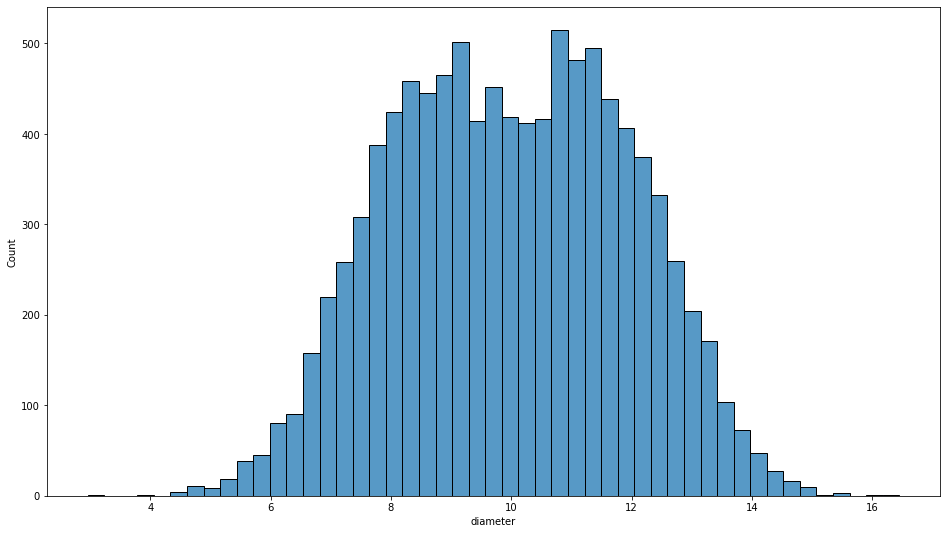

In [ ]:
plt.figure(figsize= (16,9))
sns.histplot(df.diameter)

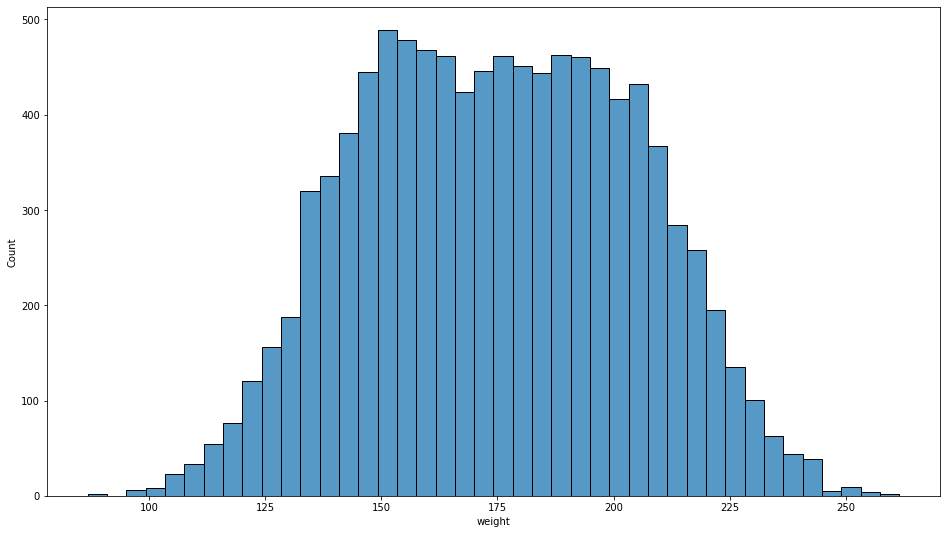

In [ ]:
plt.figure(figsize= (16,9))
sns.histplot(df.weight)

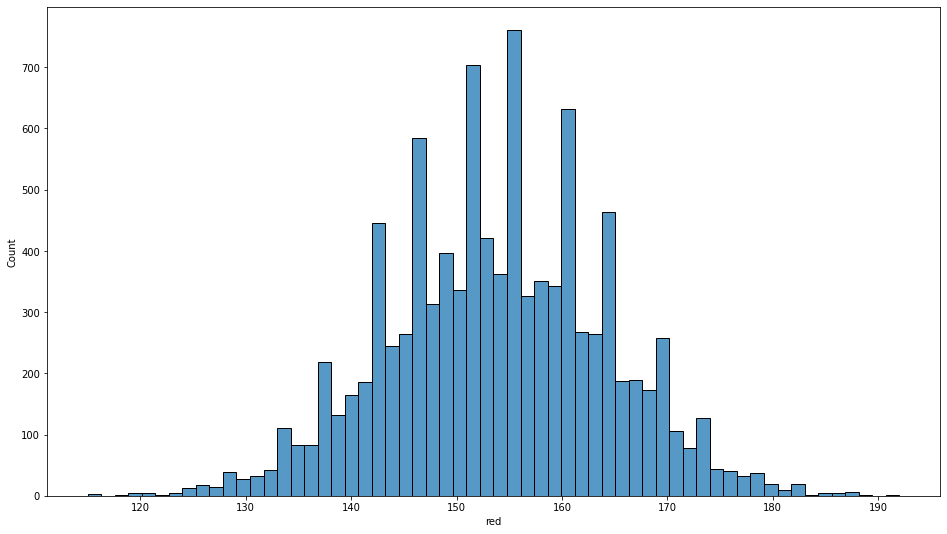

In [ ]:
plt.figure(figsize= (16,9))
sns.histplot(df.red)

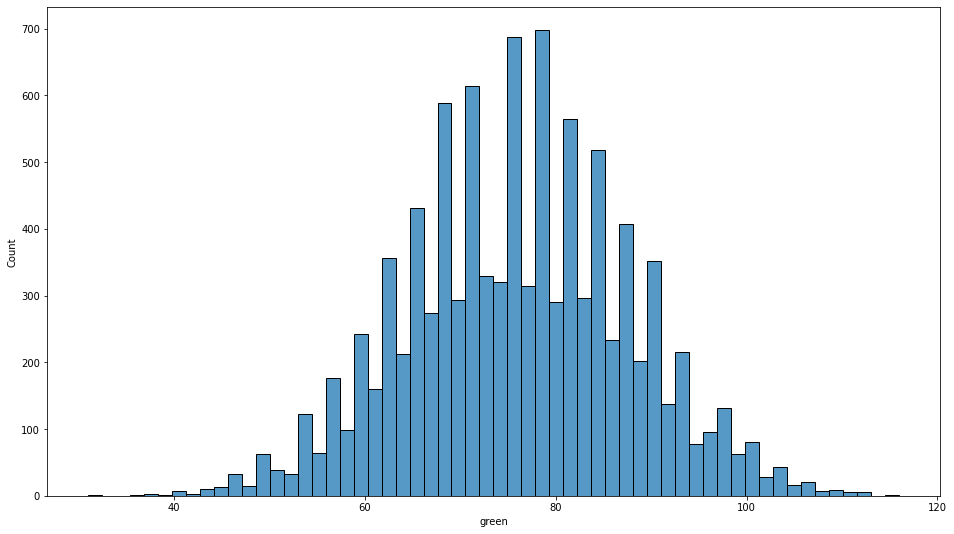

In [ ]:
plt.figure(figsize= (16,9))
sns.histplot(df.green)

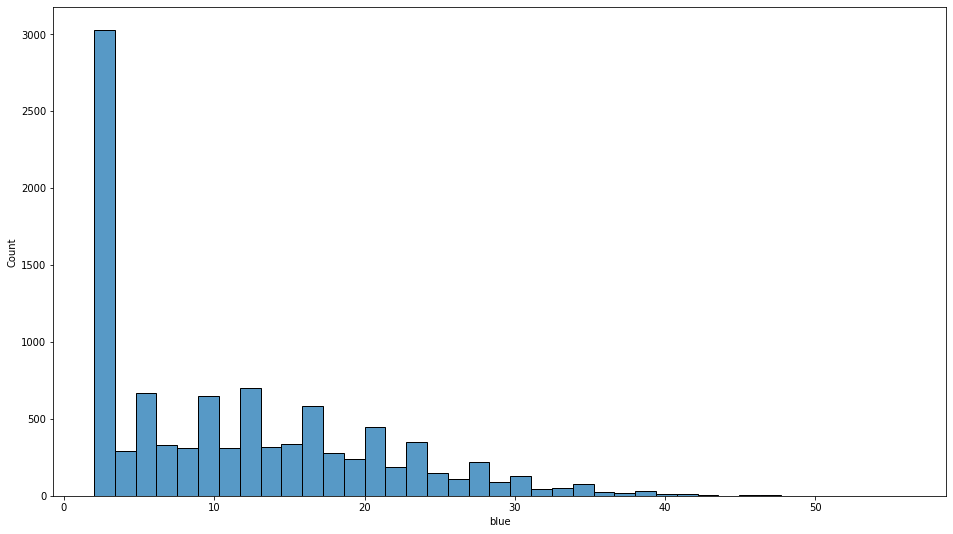

In [ ]:
plt.figure(figsize= (16,9))
sns.histplot(df.blue)

In [ ]:
df.describe(percentiles = [.05,.10,.15,.20,.25,.5,.75,.90,.95,.99])

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
5%,6.879500,129.189500,137.000000,57.000000,2.000000
10%,7.440000,137.098000,141.000000,61.000000,2.000000
15%,7.830000,142.780000,143.000000,64.000000,2.000000
20%,8.160000,147.938000,145.000000,66.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000


In [ ]:
X=df.drop('name',axis=1)
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [ ]:
y=df.name

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((7000, 5), (3000, 5))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
classifier_rf.oob_score_

0.9285714285714286

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.5min finished


CPU times: user 8.56 s, sys: 480 ms, total: 9.04 s
Wall time: 3min 32s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [ ]:
grid_search.best_score_

0.9412857142857143

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

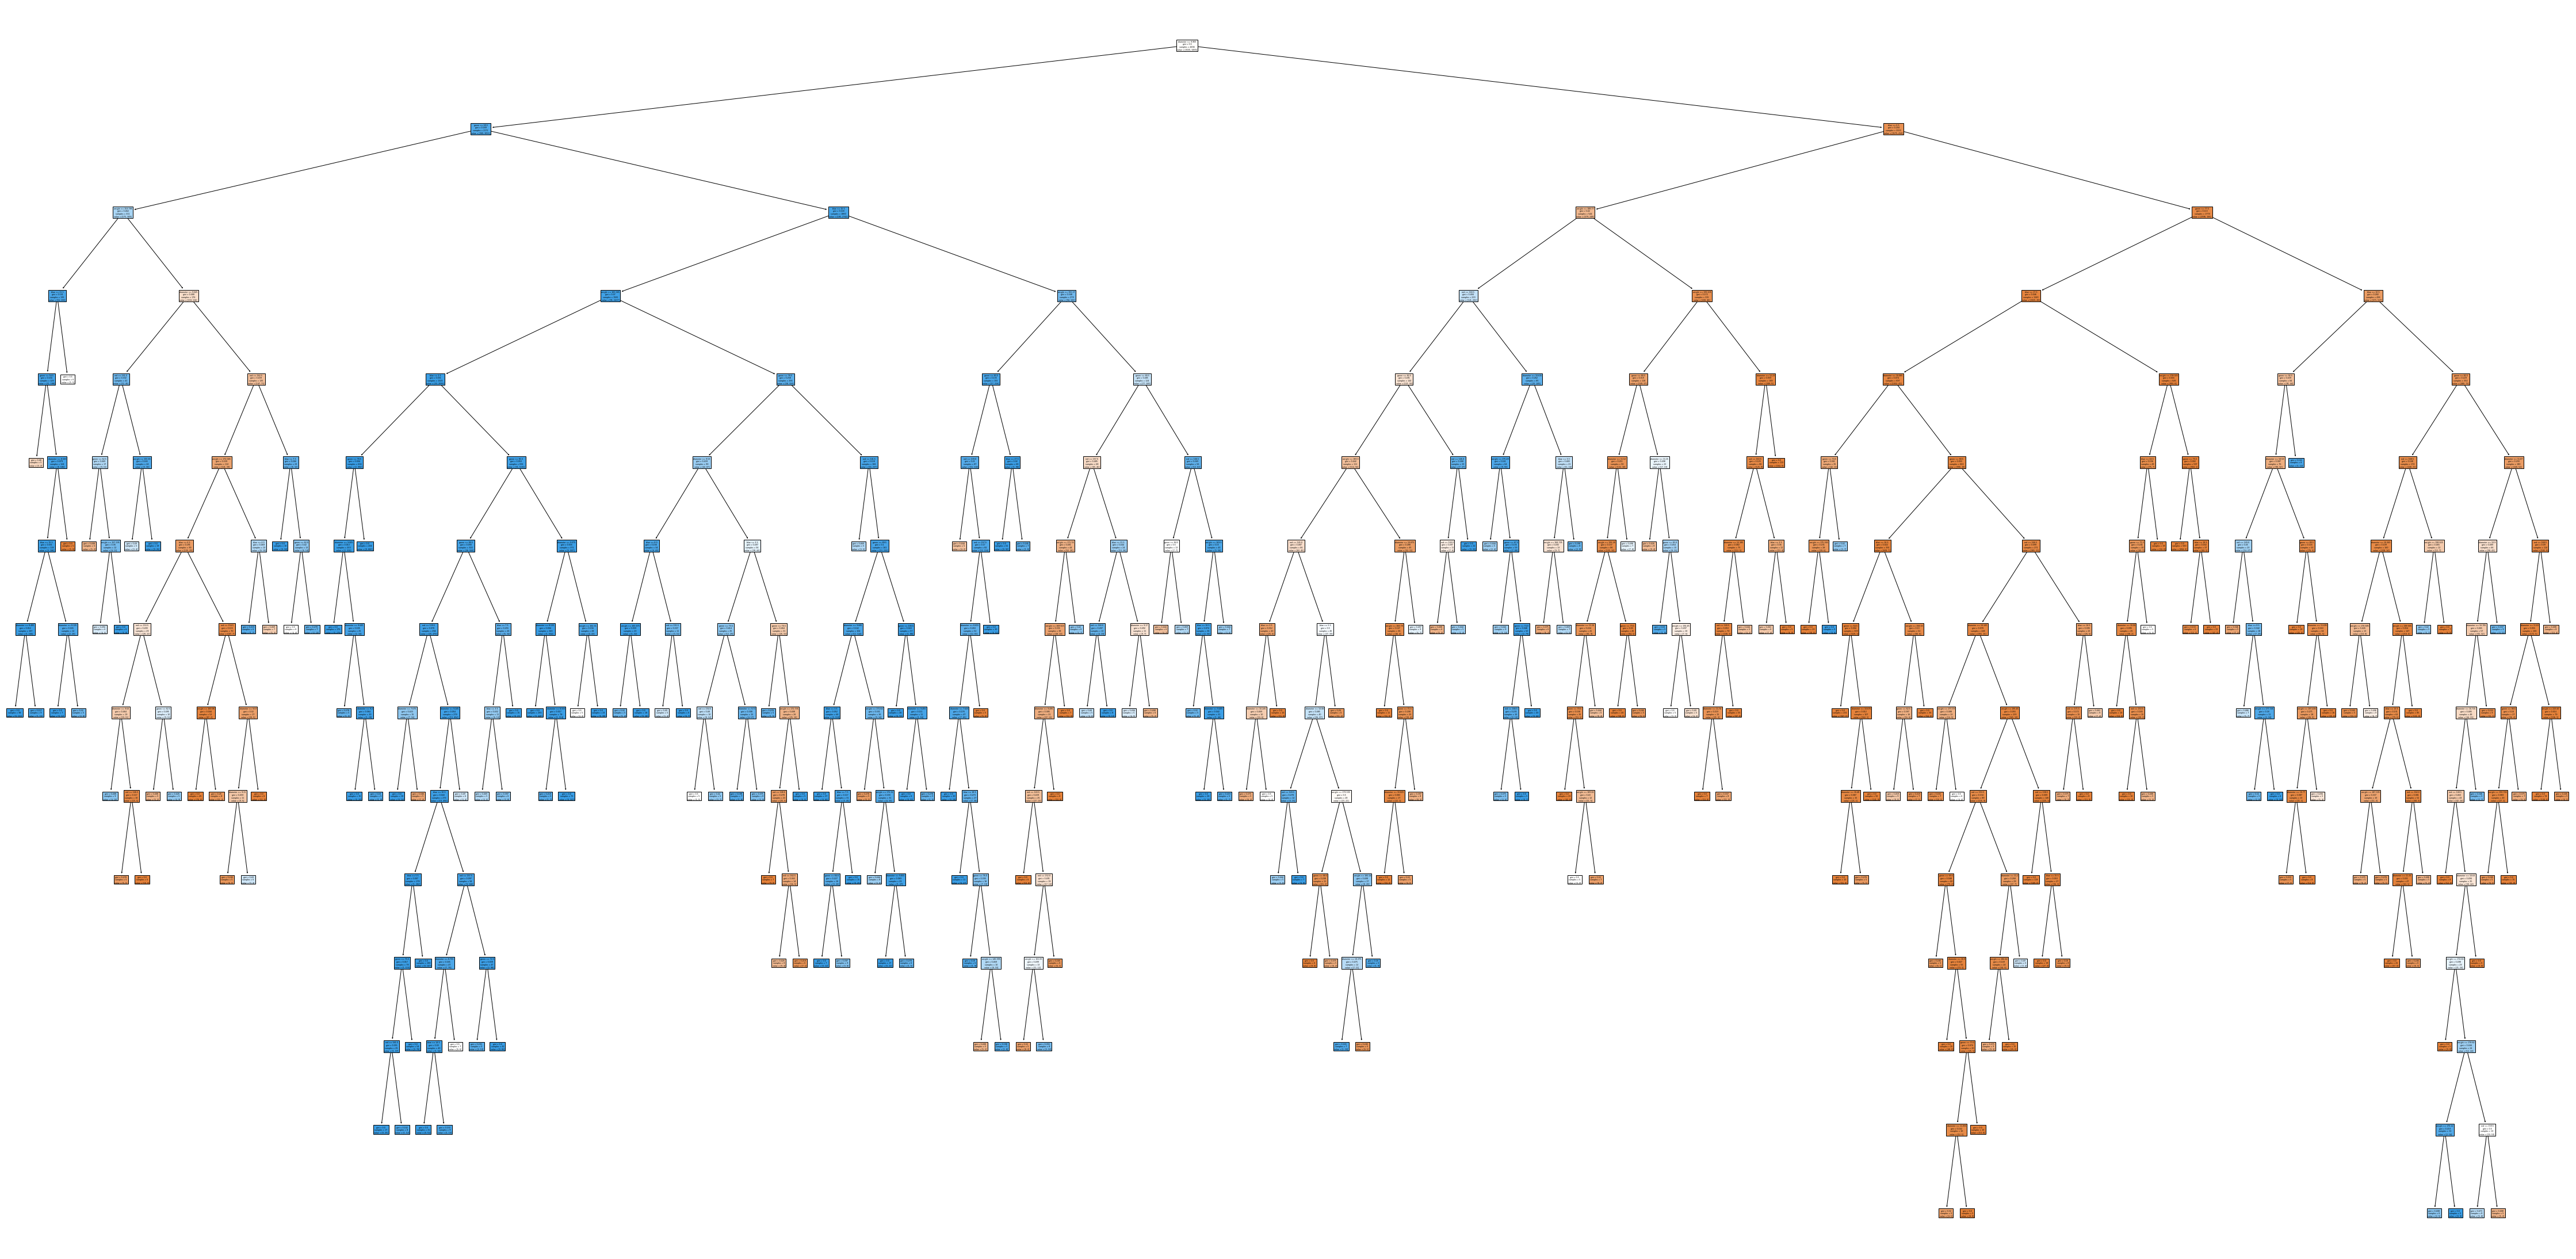

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,filled=True);

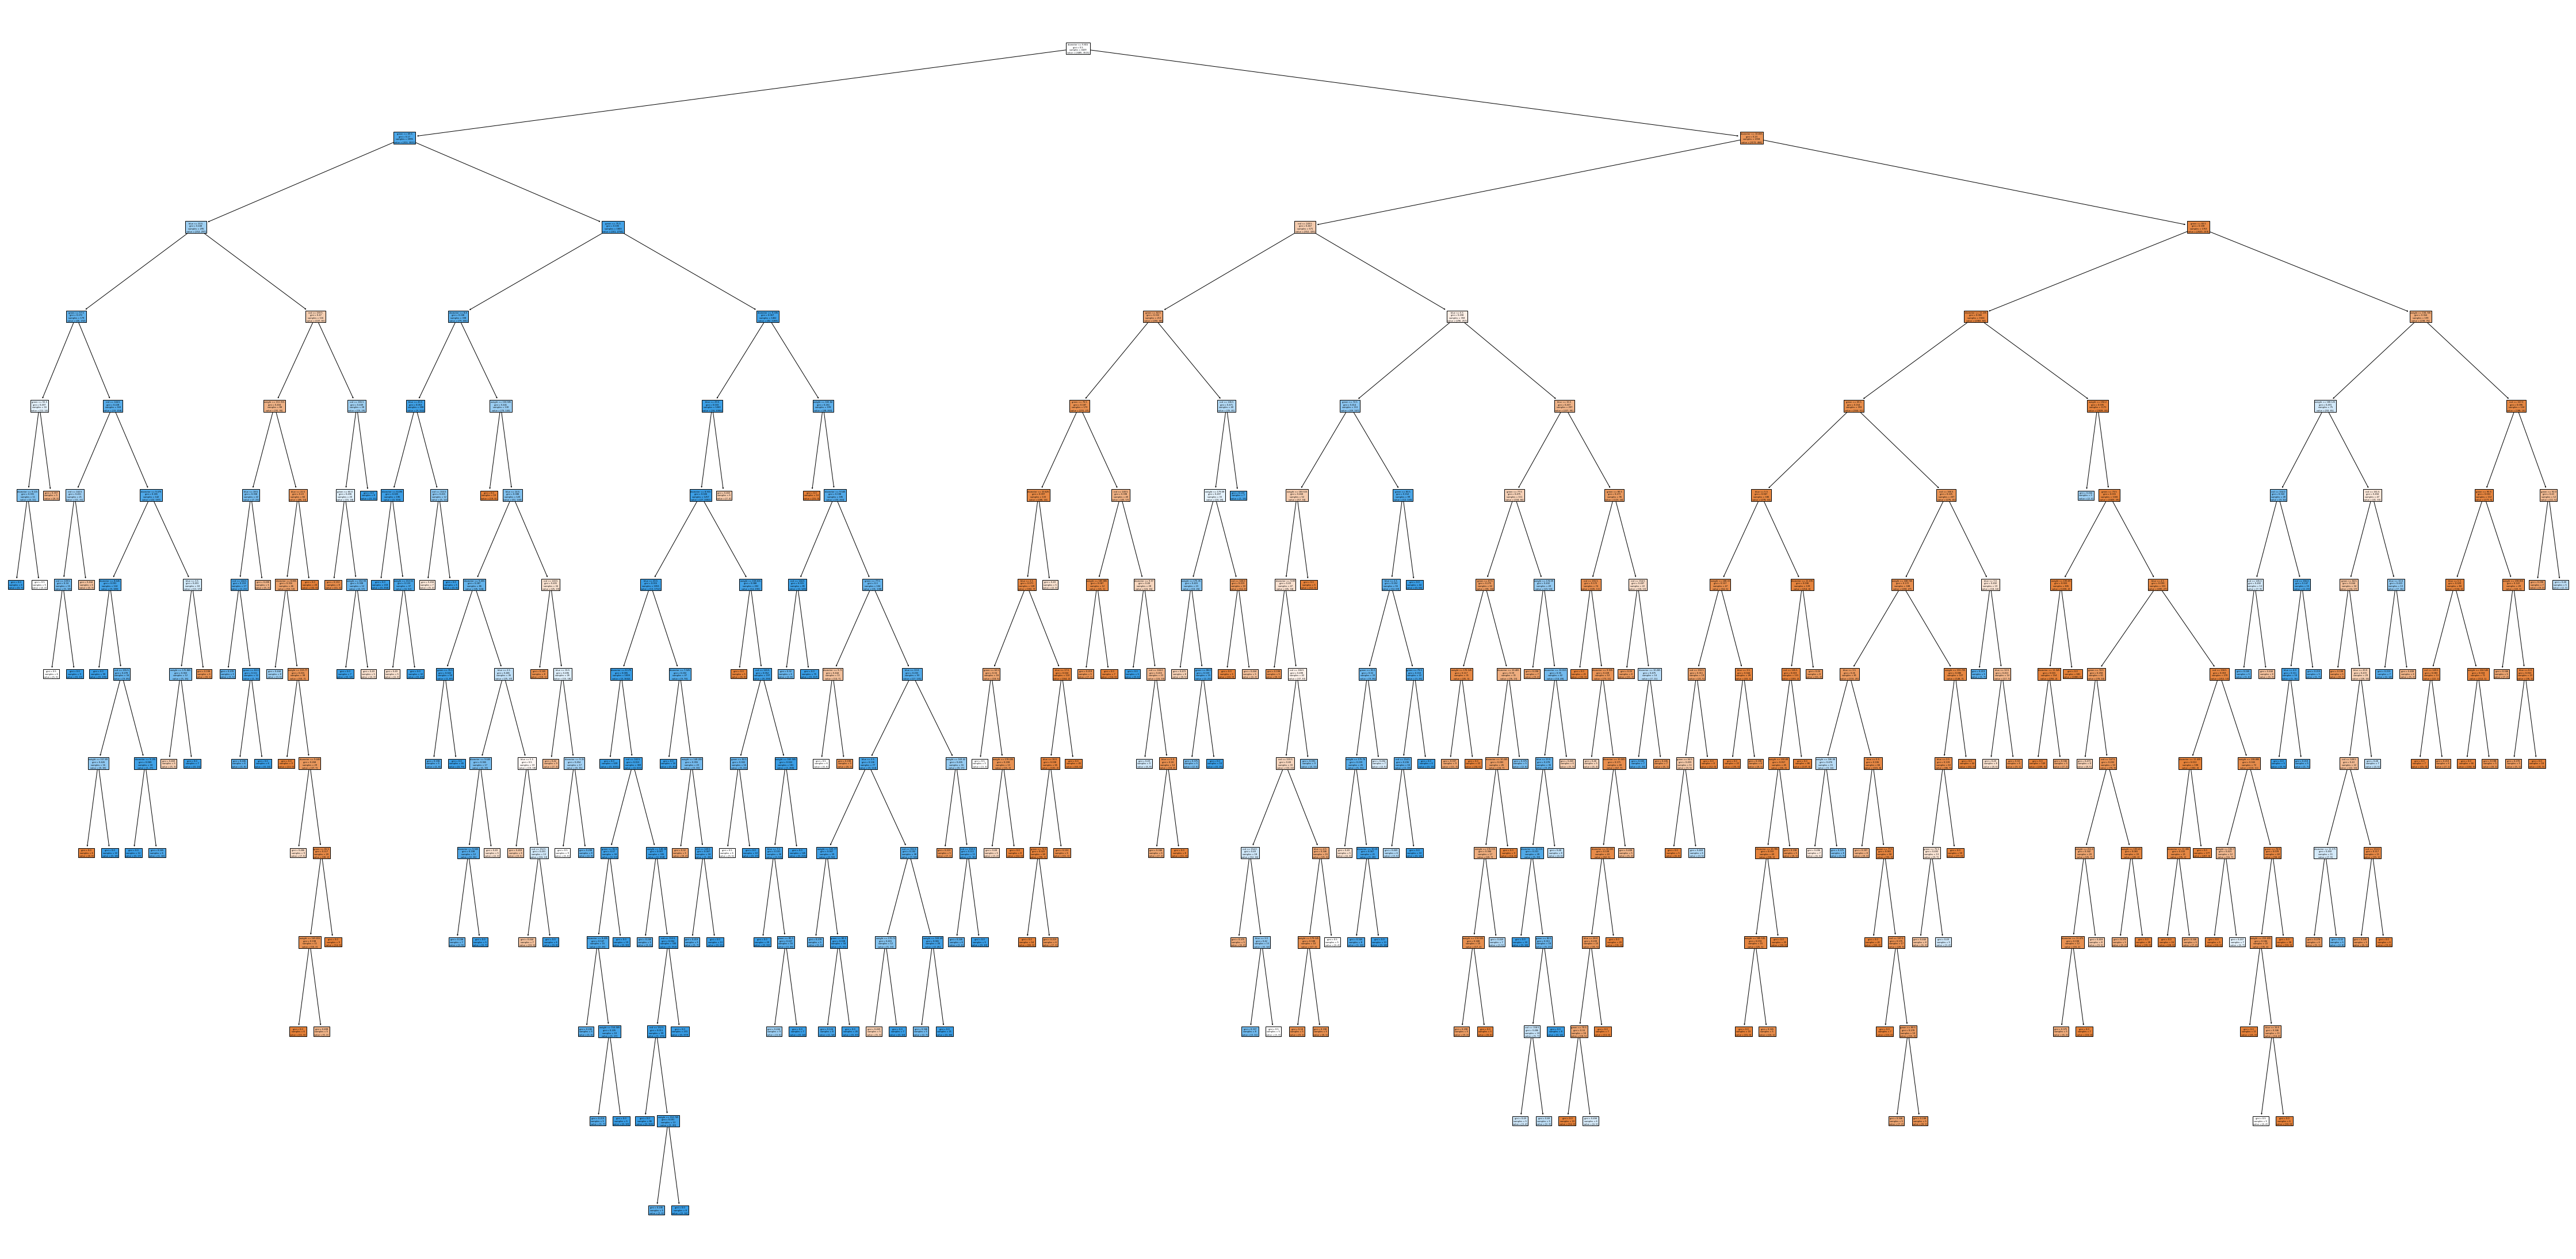

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,filled=True);

In [ ]:
rf_best.feature_importances_

array([0.44338901, 0.33326115, 0.02945592, 0.11570381, 0.07819011])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,diameter,0.443389
1,weight,0.333261
3,green,0.115704
4,blue,0.078190
2,red,0.029456
